In [1]:
import pandas as pd
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt



In [2]:
df_year=pd.read_csv('estimated_birth_years_1000.csv')
df_year=df_year.dropna(subset=['Birth year'])

df_communities=pd.read_csv('all_communities_infomap.csv',sep=';')
df_communities=df_communities[df_communities['Year']==2024]
df_communities['Members']=df_communities['Members'].apply(lambda x: x.split(', '))
df_communities=df_communities.explode('Members')
df_communities.rename(columns = {'Members':'Name'}, inplace = True)

df=df_communities.merge(df_year, on='Name', how='inner')
df=df[['Name','Birth year','Community ID']]
df=df.drop_duplicates(subset='Name')

gender=pd.read_csv('gendered_titles_final.csv')
gender=gender.drop_duplicates(subset='Name')

df=gender.merge(df, on='Name', how='left')
df=df[['Name','gender','Birth year','Community ID']]

df_male=df[df['gender']=='m']
df_female=df[df['gender']=='f']
male_years = df_male['Birth year'].dropna().astype(int)
female_years = df_female['Birth year'].dropna().astype(int)

In [3]:
print("Average birth year for men:")
print(male_years.mean())
print("Average birth year for women:")
print(female_years.mean())  

Average birth year for men:
1850.0575794998456
Average birth year for women:
1924.8643042350907


In [4]:
np.percentile(male_years, [25, 50, 75])

array([1850., 1914., 1945.])

In [5]:
np.percentile(female_years, [25, 50, 75])

array([1910., 1950., 1982.])

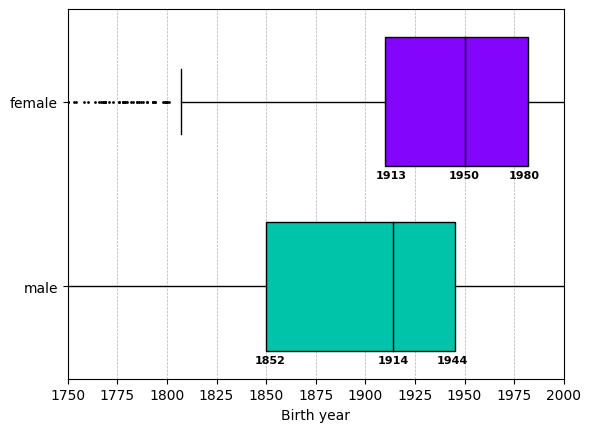

In [6]:
yearsdata = [male_years, female_years]
labels = ['male', 'female']
colors = ['#00C4AA','#8405FB']

    
# Plotting
fig, ax = plt.subplots()
ax.set_xlabel('Birth year')
bplot = ax.boxplot(
    yearsdata, 
    patch_artist=True, 
    labels=labels,
    flierprops=dict(marker='.', color='b', markersize=2),  
    vert=False, 
    boxprops=dict(facecolor='black', color='black'),
    medianprops=dict(color='black'), 
    widths=0.7
)

for patch, color in zip(bplot['boxes'], colors):
    patch.set_facecolor(color)


plt.xlim(1750, 2000)


plt.xticks(np.arange(1750, 2001, 25))
plt.grid(axis='x', linestyle='--', linewidth=0.5)

plt.text(1852, 0.6, '1852', fontsize=8, color='black', ha='center', va='center',fontweight='bold')
plt.text(1914, 0.6, '1914', fontsize=8, color='black', ha='center', va='center',fontweight='bold')
plt.text(1944, 0.6, '1944', fontsize=8, color='black', ha='center', va='center',fontweight='bold')

plt.text(1913, 1.6, '1913', fontsize=8, color='black', ha='center', va='center',fontweight='bold')
plt.text(1950, 1.6, '1950', fontsize=8, color='black', ha='center', va='center',fontweight='bold')
plt.text(1980, 1.6, '1980', fontsize=8, color='black', ha='center', va='center',fontweight='bold')


plt.show()


In [7]:
c1=df[df['Community ID']==1]['Birth year'].dropna().astype(int)
c2=df[df['Community ID']==2]['Birth year'].dropna().astype(int)
c3=df[df['Community ID']==3]['Birth year'].dropna().astype(int)
c4=df[df['Community ID']==4]['Birth year'].dropna().astype(int)
c8=df[df['Community ID']==8]['Birth year'].dropna().astype(int)

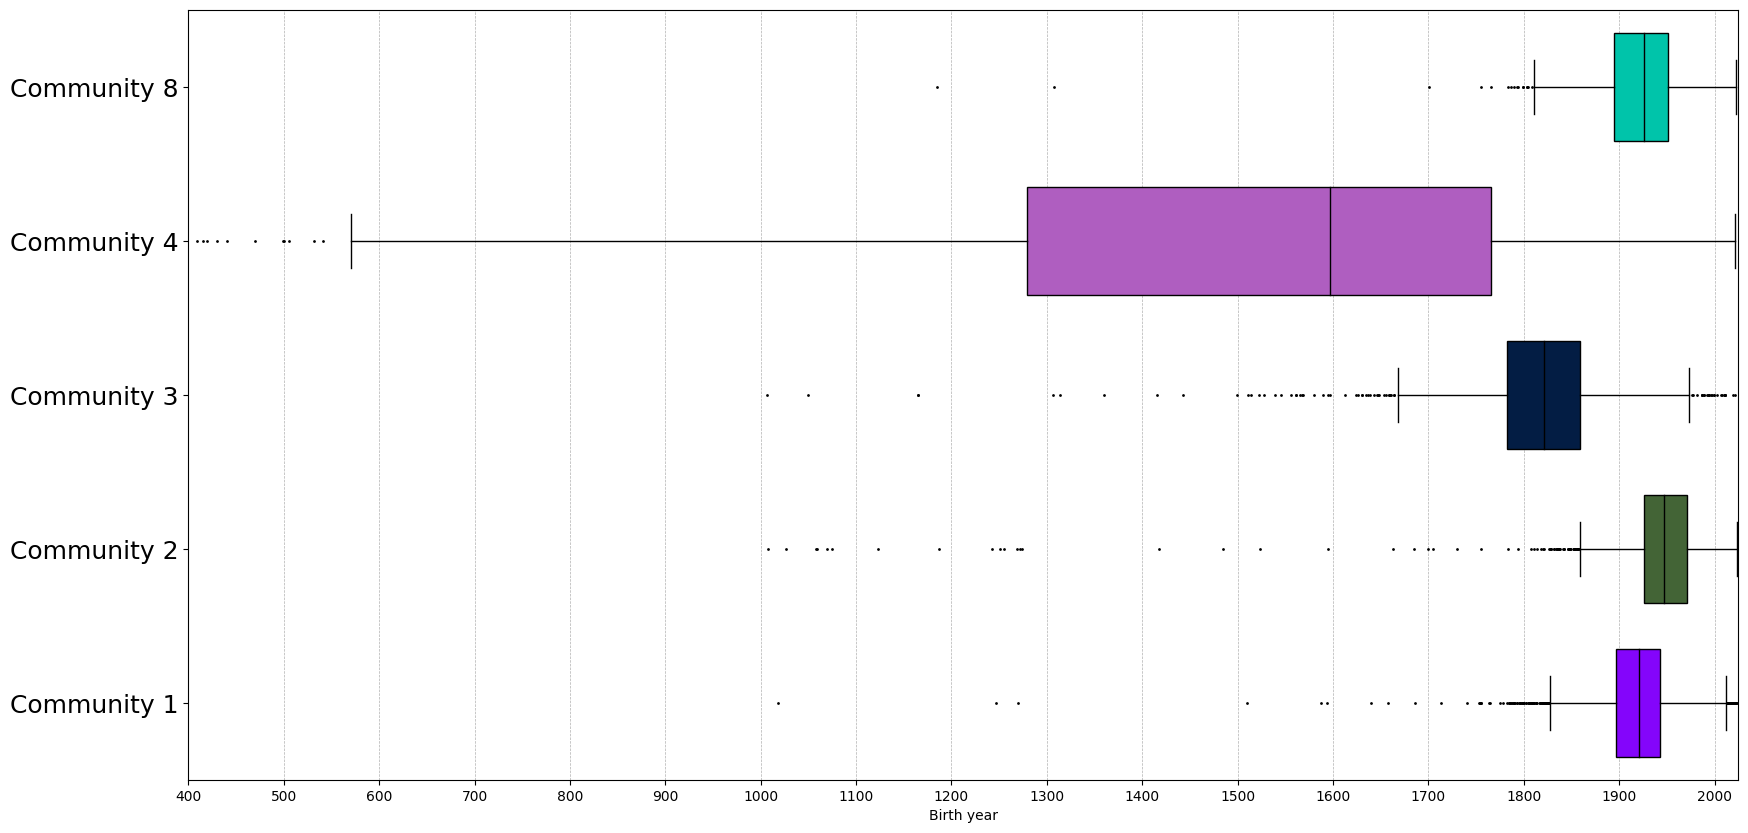

In [8]:
communites = [c1, c2, c3, c4, c8]
labels = ['Community 1', 'Community 2', 'Community 3', 'Community 4', 'Community 8']
colors=['#8405FB','#436436','#031D44','#AF5EC0','#00C4AA']
filtered_data = []
percentiles = [] 
for data in communites:
    filtered_data.append(data)

# Plotting
fig, ax = plt.subplots(figsize=(20, 10))
ax.set_xlabel('Birth year')
bplot = ax.boxplot(
    filtered_data, 
    patch_artist=True, 
    labels=labels,
    flierprops=dict(marker='.', color='b', markersize=2),  
    vert=False, 
    boxprops=dict(facecolor='black', color='black'),
    medianprops=dict(color='black'), 
    widths=0.7
)

for patch, color in zip(bplot['boxes'], colors):
    patch.set_facecolor(color)

plt.xlim(400, 2025)
plt.xticks(np.arange(400, 2001, 100))
plt.grid(axis='x', linestyle='--', linewidth=0.5)


ax.tick_params(axis='y', labelsize=18)  

plt.show()

For appendix

In [9]:
def percentile_25(x):
    return x.quantile(0.25)

def percentile_75(x):
    return x.quantile(0.75)

# Group by 'Community ID' and aggregate with median, std, 25th and 75th percentiles
df_com = df.groupby('Community ID').agg({
    'Birth year': [percentile_25,'median', percentile_75]
}).reset_index()

# Rename columns for better readability
df_com.columns = ['Community ID', '25th Percentile', 'Median Birth Year', '75th Percentile']

df_com['25th Percentile']=df_com['25th Percentile'].astype(int)
df_com['Median Birth Year']=df_com['Median Birth Year'].astype(int)
df_com['75th Percentile']=df_com['75th Percentile'].astype(int)
df_com['Community ID']=df_com['Community ID'].astype(int)

In [10]:
df_com=df_com[df_com['Community ID'].isin([1,2,3,4,5,6,7,8,9,10,11,12,13,16])]

In [11]:
df_com['diff']=df_com['75th Percentile']-df_com['25th Percentile']
df_com

,Community ID,25th Percentile,Median Birth Year,75th Percentile,diff
0,1,1897,1921,1943,46
1,2,1926,1947,1971,45
2,3,1782,1821,1859,77
3,4,1279,1597,1765,486
4,5,1862,1902,1932,70
5,6,1902,1930,1951,49
6,7,1940,1955,1978,38
7,8,1895,1926,1951,56
8,9,1855,1884,1908,53
9,10,1885,1918,1946,61
